# **Demystifying Patent Activity**
---
**Team 01:**

Gunjan Sharma, Jasmine Gohil, Jenil Shah, Mahika Bhartari, Sneha Ekka

**Tableau Dashboard Link:**

https://public.tableau.com/views/BA875_Dashboard/Dashboard1?:language=en-US&publish=yes&:sid=&:display_count=n&:origin=viz_share_link

## 1 - Import Libraries and Data

In [ ]:
# importing functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from pyfixest import feols, fepois
from pyfixest import etable

# Dataset Four - Patent Activity With GVKEY (subset)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

data_1 = pd.read_csv('/content/gdrive/MyDrive/BA875-Team01-Project/Dataset 4 UPDATED/Patent_Activity_With_GVKEY_subset.csv')

Mounted at /content/gdrive/


<ipython-input-2-f852de1f4a97>:4: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data_1 = pd.read_csv('/content/gdrive/MyDrive/BA875-Team01-Project/Dataset 4 UPDATED/Patent_Activity_With_GVKEY_subset.csv')


## 2 - Examin the Data

In [ ]:
data_1

,gvkey,gvkey_numeric,patnum,year,backward_cites,forward_cites,ptype,ee_name,ee_country
0,160718,160718,7861318,2007,11,1,utility,"Morning Pride Manufacturing, L.L.C.",US
1,10535,10535,7861331,2003,10,8,utility,Thetford Corporation,US
2,10115,10115,7861334,2006,26,52,utility,Stryker Corporation,US
3,10115,10115,7861335,2007,28,6,utility,Stryker Corporation,US
4,11465,11465,7861343,2007,114,1,utility,Whirlpool Corporation,US
...,...,...,...,...,...,...,...,...,...
1522408,10622,10622,RE047788,2018,28,0,reissue,"TOSHIBA MATERIALS CO., LTD.",JP
1522409,31295,31295,RE047789,2018,254,1,reissue,"WCM Industries, Inc.",US
1522410,5047,5047,RE047790,2013,16,0,reissue,General Electric Company,US
1522411,251303,251303,RE047792,2014,3,0,reissue,LG ELECTRONICS INC.,KR


In [ ]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1522413 entries, 0 to 1522412
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   gvkey           1522413 non-null  int64 
 1   gvkey_numeric   1522413 non-null  int64 
 2   patnum          1522413 non-null  object
 3   year            1522413 non-null  int64 
 4   backward_cites  1522413 non-null  int64 
 5   forward_cites   1522413 non-null  int64 
 6   ptype           1522413 non-null  object
 7   ee_name         1521632 non-null  object
 8   ee_country      1522348 non-null  object
dtypes: int64(5), object(4)
memory usage: 104.5+ MB


In [ ]:
data_1.describe()

,gvkey,gvkey_numeric,year,backward_cites,forward_cites
count,1.522413e+06,1.522413e+06,1.522413e+06,1.522413e+06,1.522413e+06
mean,8.311719e+04,8.311722e+04,2.012104e+03,1.911130e+01,3.604686e+00
std,9.090504e+04,9.090544e+04,3.340957e+00,6.613128e+01,1.591601e+01
min,1.002000e+03,1.002000e+03,1.972000e+03,0.000000e+00,0.000000e+00
25%,7.228000e+03,7.228000e+03,2.010000e+03,2.000000e+00,0.000000e+00
50%,2.736400e+04,2.736400e+04,2.012000e+03,6.000000e+00,0.000000e+00
75%,1.407560e+05,1.407560e+05,2.015000e+03,1.400000e+01,2.000000e+00
max,1.420000e+06,1.421755e+06,2.019000e+03,5.067000e+03,1.299000e+03


## 3 - Clean the data

In [ ]:
# Check for duplicates
duplicates_1 = data_1.duplicated().sum()
duplicates_1

115

In [ ]:
# Dropping duplicates
data_1.drop_duplicates(inplace=True)
data_1.shape

(1522298, 9)

In [ ]:
# Check for missing values
missing_values = data_1.isnull().sum()
missing_values

gvkey               0
gvkey_numeric       0
patnum              0
year                0
backward_cites      0
forward_cites       0
ptype               0
ee_name           671
ee_country         62
dtype: int64

In [ ]:
# Data types and potential anomalies
data_types = data_1.dtypes
data_types

gvkey              int64
gvkey_numeric      int64
patnum            object
year               int64
backward_cites     int64
forward_cites      int64
ptype             object
ee_name           object
ee_country        object
dtype: object

##4 - Visualize the data

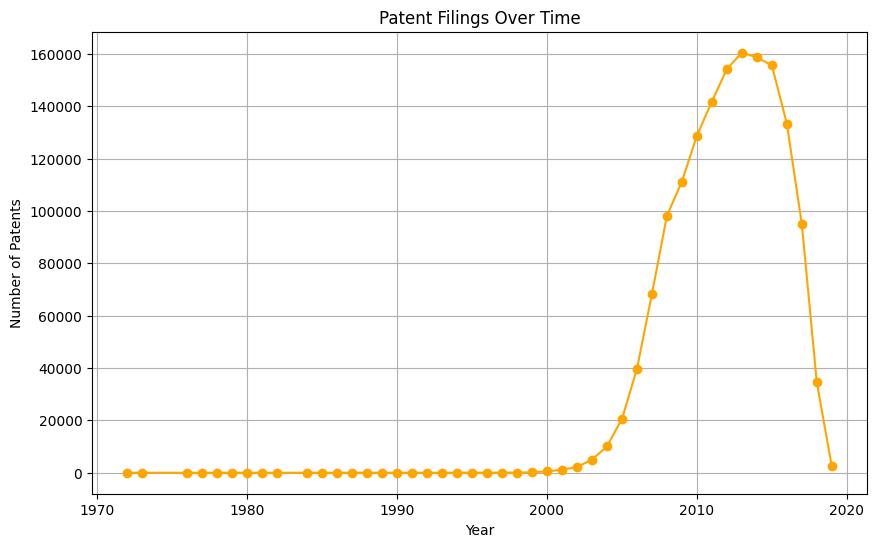

In [ ]:
# visualizing number of patents over time
patents_per_year = data_1.groupby('year')['patnum'].count()
plt.figure(figsize=(10, 6))
patents_per_year_plot = patents_per_year.plot(marker='o', linestyle='-', color='orange')
plt.title('Patent Filings Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Patents')
plt.grid(True)
plt.show()

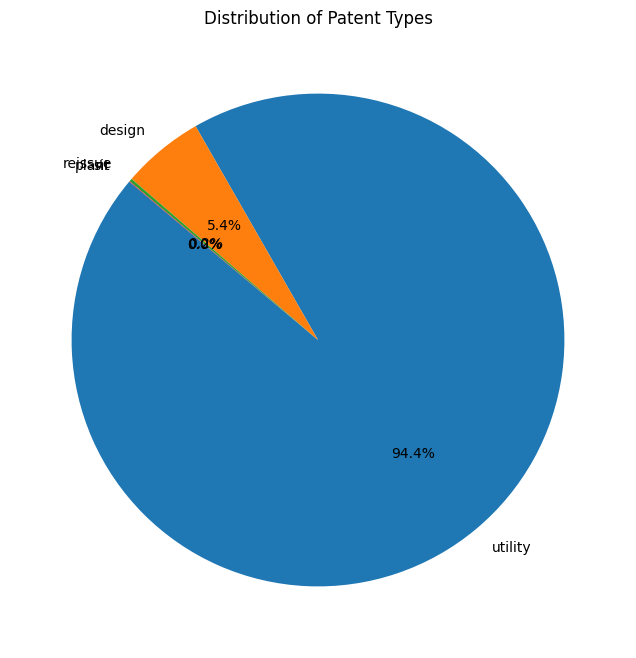

In [ ]:
# distribution of patent types
ptype_counts = data_1['ptype'].value_counts()

plt.figure(figsize=(8, 8))
ptype_plot = plt.pie(ptype_counts, labels=ptype_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Patent Types')
plt.show()

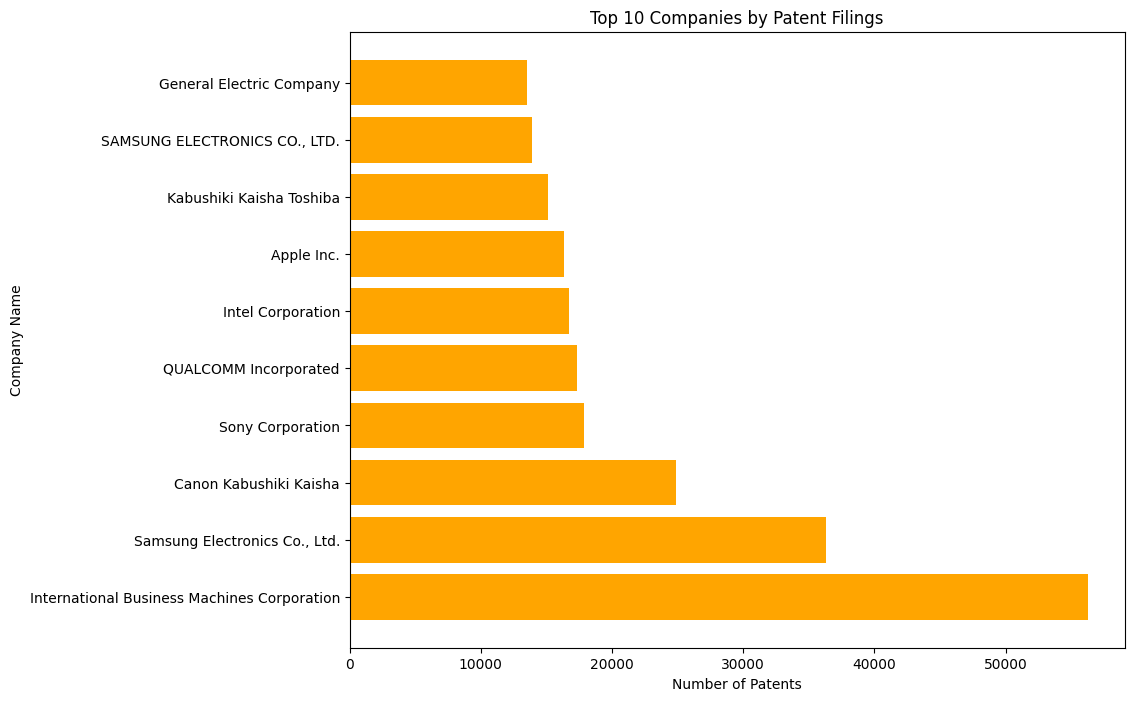

In [ ]:
# plot of top 10 companies by patent filings
top_companies = data_1['ee_name'].value_counts().head(10)
plt.figure(figsize=(10, 8))
top_companies_plot = plt.barh(top_companies.index, top_companies.values, color='orange')
plt.title('Top 10 Companies by Patent Filings')
plt.xlabel('Number of Patents')
plt.ylabel('Company Name')
plt.show()

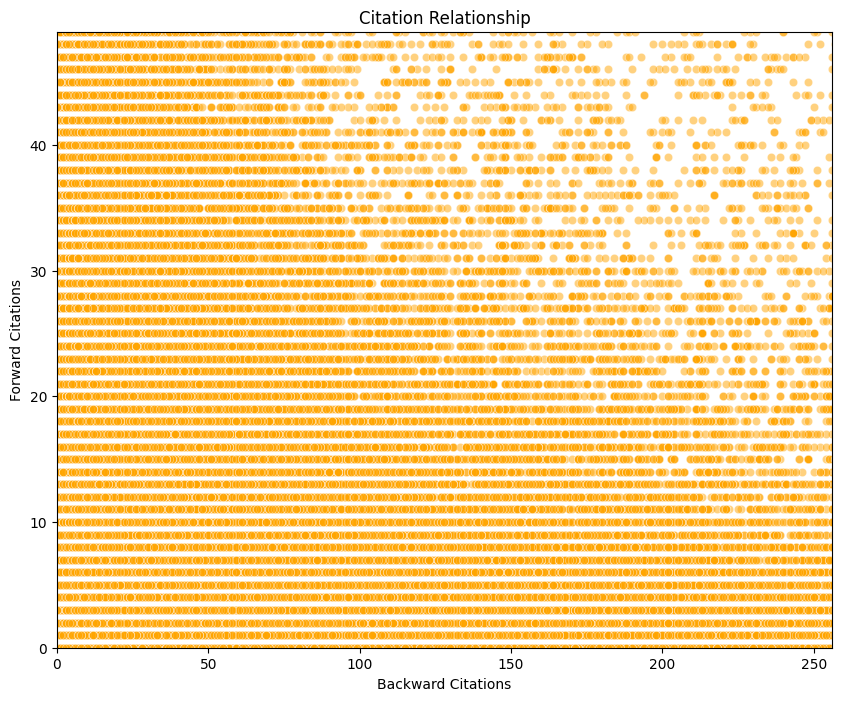

In [ ]:
# forward citation and backward citation
plt.figure(figsize=(10, 8))
citation_plot = sns.scatterplot(data=data_1, x='backward_cites', y='forward_cites', alpha=0.5, color='orange')
plt.title('Citation Relationship')
plt.xlabel('Backward Citations')
plt.ylabel('Forward Citations')
plt.xlim(0, data_1['backward_cites'].quantile(0.99))
plt.ylim(0, data_1['forward_cites'].quantile(0.99))
plt.show()

# Dataset Four - Patent Activity With GVKEY YEARLY STATS (subset)

In [ ]:
# loading data
data_2 = pd.read_csv('/content/gdrive/MyDrive/BA875-Team01-Project/Dataset 4 UPDATED/Patent_Activity_With_GVKEY_YEARLY_STATS_subset.csv')

## 2 - Examin the Data

In [ ]:
data_2

,gvkey,gvkey_numeric,company_name,country,year,functional_innovations,design_innovations,degree_of_originality,degree_of_influence
0,1002,1002,AAI Corporation,US,2004,1,1,124.000000,1.000000
1,1002,1002,AAI Corporation,US,2006,1,1,2.000000,0.000000
2,1002,1002,AAI Corporation,US,2007,2,2,30.500000,3.500000
3,1002,1002,AAI Corporation,US,2009,8,8,12.125000,2.125000
4,1002,1002,AAI Corporation,US,2010,6,6,25.333334,1.833333
...,...,...,...,...,...,...,...,...,...
78077,1420000,1421755,BCD Semiconductor Manufacturing Limited,KY,2012,4,4,7.500000,1.250000
78078,1420000,1421755,"BCD Semiconductor Manufacturing Co., Ltd.",CN,2013,3,3,2.000000,0.333333
78079,1420000,1421755,BCD Semiconductor Manufacturing Limited,KY,2014,2,2,25.500000,0.000000
78080,1420000,1421755,BCD Semiconductor Manufacturing Limited,KY,2015,1,1,3.000000,0.000000


In [ ]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78082 entries, 0 to 78081
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gvkey                   78082 non-null  int64  
 1   gvkey_numeric           78082 non-null  int64  
 2   company_name            78036 non-null  object 
 3   country                 78082 non-null  object 
 4   year                    78082 non-null  int64  
 5   functional_innovations  78082 non-null  int64  
 6   design_innovations      78082 non-null  int64  
 7   degree_of_originality   78082 non-null  float64
 8   degree_of_influence     78082 non-null  float64
dtypes: float64(2), int64(5), object(2)
memory usage: 5.4+ MB


In [ ]:
data_2.describe()

,gvkey,gvkey_numeric,year,functional_innovations,design_innovations,degree_of_originality,degree_of_influence
count,7.808200e+04,7.808200e+04,78082.000000,78082.000000,78082.000000,78082.000000,78082.000000
mean,1.303169e+05,1.303171e+05,2011.365142,19.497618,19.497618,24.715193,3.971061
std,1.071151e+05,1.071173e+05,4.188255,138.169267,138.169267,58.604511,11.944695
min,1.002000e+03,1.002000e+03,1972.000000,1.000000,1.000000,0.000000,0.000000
25%,2.152200e+04,2.152200e+04,2008.000000,1.000000,1.000000,4.192618,0.000000
50%,1.117650e+05,1.117650e+05,2012.000000,2.000000,2.000000,10.000000,1.000000
75%,2.158420e+05,2.158420e+05,2015.000000,7.000000,7.000000,23.000000,3.750000
max,1.420000e+06,1.421755e+06,2019.000000,8750.000000,8750.000000,4666.000000,715.000000


## 3 - Clean the data

In [ ]:
# Check for duplicates
duplicates = data_2.duplicated().sum()
duplicates

0

In [ ]:
# Check for missing values
missing_values = data_2.isnull().sum()
missing_values

gvkey                      0
gvkey_numeric              0
company_name              46
country                    0
year                       0
functional_innovations     0
design_innovations         0
degree_of_originality      0
degree_of_influence        0
dtype: int64

In [ ]:
# Data types and potential anomalies
data_types = data_2.dtypes
data_types

gvkey                       int64
gvkey_numeric               int64
company_name               object
country                    object
year                        int64
functional_innovations      int64
design_innovations          int64
degree_of_originality     float64
degree_of_influence       float64
dtype: object

## 4 - Visualize the data

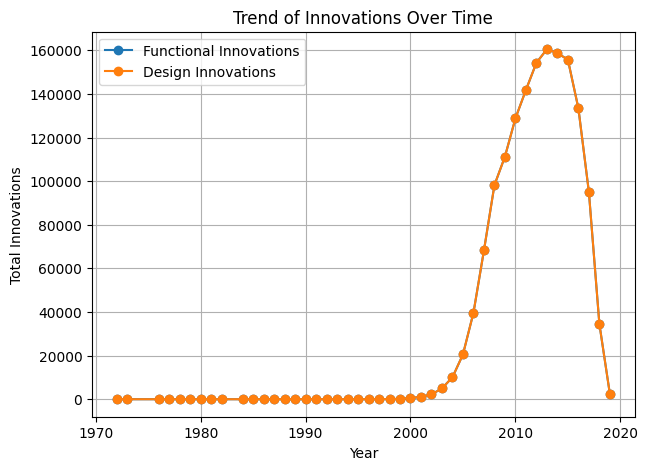

In [ ]:
# Aggregate the data for the total number of innovations over the years
innovations_by_year = data_2.groupby('year').agg({
    'functional_innovations': 'sum',
    'design_innovations': 'sum'
}).reset_index()

plt.figure(figsize=(7, 5))
plt.plot(innovations_by_year['year'], innovations_by_year['functional_innovations'], label='Functional Innovations', marker='o')
plt.plot(innovations_by_year['year'], innovations_by_year['design_innovations'], label='Design Innovations', marker='o')
plt.title('Trend of Innovations Over Time')
plt.xlabel('Year')
plt.ylabel('Total Innovations')
plt.legend()
plt.grid(True)
plt.show()

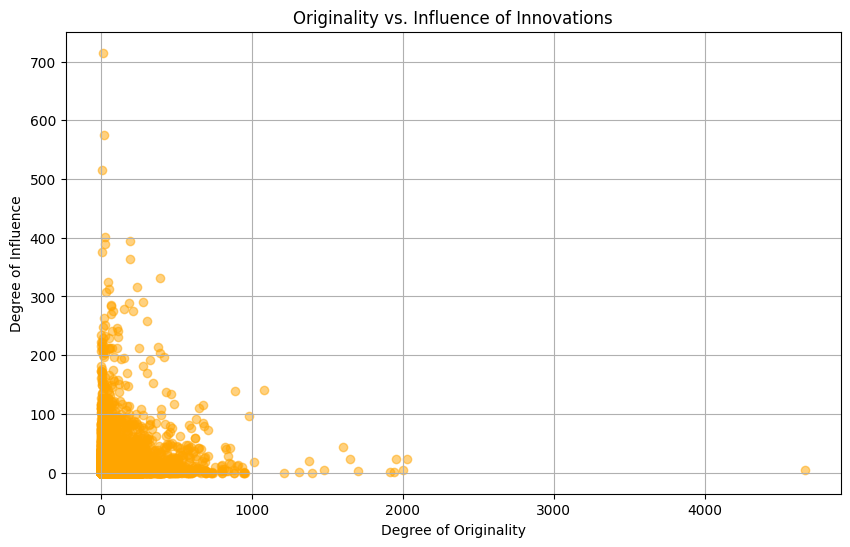

In [ ]:
# originality vs influence
plt.figure(figsize=(10, 6))
plt.scatter(data_2['degree_of_originality'], data_2['degree_of_influence'], alpha=0.5, color='orange')
plt.title('Originality vs. Influence of Innovations')
plt.xlabel('Degree of Originality')
plt.ylabel('Degree of Influence')
plt.grid(True)
plt.show()

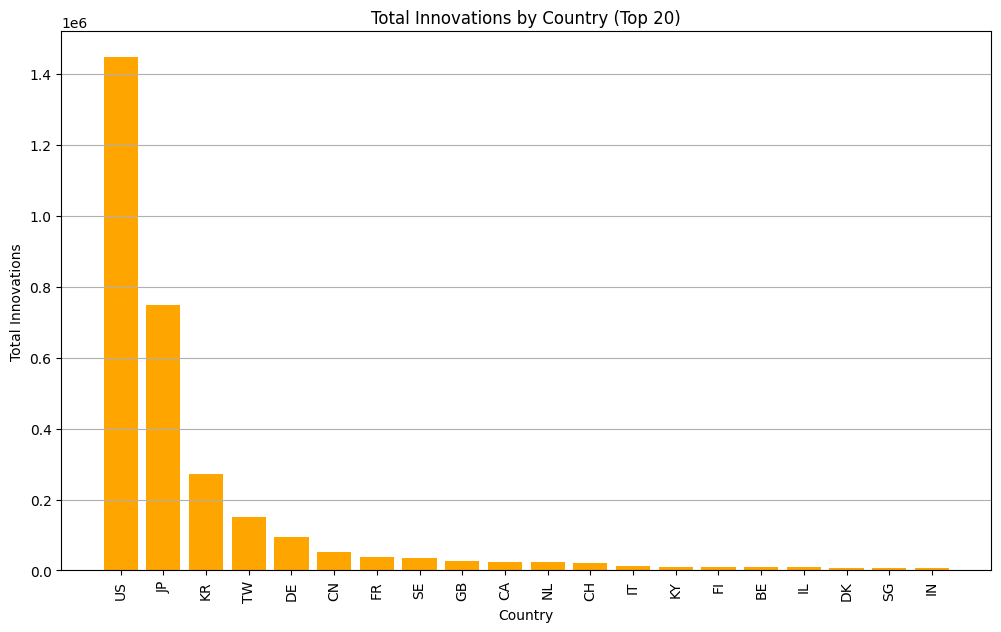

In [ ]:
# Aggregate the data for the total number of innovations by country
innovations_by_country = data_2.groupby('country').agg({
    'functional_innovations': 'sum',
    'design_innovations': 'sum'
}).reset_index()

# Sum functional and design innovations
innovations_by_country['total_innovations'] = innovations_by_country['functional_innovations'] + innovations_by_country['design_innovations']

top_20_countries = innovations_by_country.sort_values(by='total_innovations', ascending=False).head(20)

plt.figure(figsize=(12, 7))
plt.bar(top_20_countries['country'], top_20_countries['total_innovations'], color='orange')
plt.title('Total Innovations by Country (Top 20)')
plt.xlabel('Country')
plt.ylabel('Total Innovations')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

# Merge

In [ ]:
print(data_1.shape)
print(data_2.shape)

(1522298, 9)
(78082, 9)


In [ ]:
data_1.head()

,gvkey,gvkey_numeric,patnum,year,backward_cites,forward_cites,ptype,ee_name,ee_country
0,160718,160718,7861318,2007,11,1,utility,"Morning Pride Manufacturing, L.L.C.",US
1,10535,10535,7861331,2003,10,8,utility,Thetford Corporation,US
2,10115,10115,7861334,2006,26,52,utility,Stryker Corporation,US
3,10115,10115,7861335,2007,28,6,utility,Stryker Corporation,US
4,11465,11465,7861343,2007,114,1,utility,Whirlpool Corporation,US


In [ ]:
data_2.head()

,gvkey,gvkey_numeric,company_name,country,year,functional_innovations,design_innovations,degree_of_originality,degree_of_influence
0,1002,1002,AAI Corporation,US,2004,1,1,124.000000,1.000000
1,1002,1002,AAI Corporation,US,2006,1,1,2.000000,0.000000
2,1002,1002,AAI Corporation,US,2007,2,2,30.500000,3.500000
3,1002,1002,AAI Corporation,US,2009,8,8,12.125000,2.125000
4,1002,1002,AAI Corporation,US,2010,6,6,25.333334,1.833333


In [ ]:
# checking for number of unique gvkey in data1
data_1.gvkey.nunique()

14933

In [ ]:
# checking for number of unique gvkey in data2
data_2.gvkey.nunique()

14933

In [ ]:
# inner join data 1 and data 2 on gvkey and year
merged_inner = pd.merge(data_1, data_2, on=['gvkey','year'], how='inner')
merged_inner.shape

(1522298, 16)

In [ ]:
merged_inner[(merged_inner.gvkey == 1002) & (merged_inner.year == 2009)]

,gvkey,gvkey_numeric_x,patnum,year,backward_cites,forward_cites,ptype,ee_name,ee_country,gvkey_numeric_y,company_name,country,functional_innovations,design_innovations,degree_of_originality,degree_of_influence
520233,1002,1002,8079322,2009,8,1,utility,AAI Corporation,US,1002,AAI Corporation,US,8,8,12.125,2.125
520234,1002,1002,8220747,2009,7,1,utility,AAI Corporation,US,1002,AAI Corporation,US,8,8,12.125,2.125
520235,1002,1002,8220748,2009,7,2,utility,AAI Corporation,US,1002,AAI Corporation,US,8,8,12.125,2.125
520236,1002,1002,8220749,2009,7,2,utility,AAI Corporation,US,1002,AAI Corporation,US,8,8,12.125,2.125
520237,1002,1002,8234070,2009,6,0,utility,AAI Corporation,US,1002,AAI Corporation,US,8,8,12.125,2.125
520238,1002,1002,8275571,2009,7,0,utility,AAI Corporation,US,1002,AAI Corporation,US,8,8,12.125,2.125
520239,1002,1002,8336816,2009,48,9,utility,AAI Corporation,US,1002,AAI Corporation,US,8,8,12.125,2.125
520240,1002,1002,8706440,2009,7,2,utility,AAI Corporation,US,1002,AAI Corporation,US,8,8,12.125,2.125


## 2 - Examine the Data

In [ ]:
merged_inner.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1522298 entries, 0 to 1522297
Data columns (total 16 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   gvkey                   1522298 non-null  int64  
 1   gvkey_numeric_x         1522298 non-null  int64  
 2   patnum                  1522298 non-null  object 
 3   year                    1522298 non-null  int64  
 4   backward_cites          1522298 non-null  int64  
 5   forward_cites           1522298 non-null  int64  
 6   ptype                   1522298 non-null  object 
 7   ee_name                 1521627 non-null  object 
 8   ee_country              1522236 non-null  object 
 9   gvkey_numeric_y         1522298 non-null  int64  
 10  company_name            1521861 non-null  object 
 11  country                 1522298 non-null  object 
 12  functional_innovations  1522298 non-null  int64  
 13  design_innovations      1522298 non-null  int64  
 14  de

## 3 - Clean the data

In [ ]:
# Count null values
null_counts = merged_inner.isnull().sum()

# Create a DataFrame to store null counts and column names
null_counts_df = pd.DataFrame({'Column Name': null_counts.index, 'Null Count': null_counts.values, 'Null %': null_counts.values/len(merged_inner)})

# Sort by null counts in descending order
null_counts_df = null_counts_df.sort_values(by='Null Count', ascending=False)

# Display the table
null_counts_df[null_counts_df['Null Count'] > 0]

,Column Name,Null Count,Null %
7,ee_name,671,0.000441
10,company_name,437,0.000287
8,ee_country,62,0.000041


In [ ]:
# Check for duplicates
merged_inner.duplicated().sum()

0

In [ ]:
# Data types and potential anomalies
merged_inner.dtypes

gvkey                       int64
gvkey_numeric_x             int64
patnum                     object
year                        int64
backward_cites              int64
forward_cites               int64
ptype                      object
ee_name                    object
ee_country                 object
gvkey_numeric_y             int64
company_name               object
country                    object
functional_innovations      int64
design_innovations          int64
degree_of_originality     float64
degree_of_influence       float64
dtype: object

In [ ]:
# Drop duplicate columns
merged_inner.drop(columns=['gvkey_numeric_x', 'gvkey_numeric_y', 'ee_name', 'ee_country'], axis=1, inplace=True)

In [ ]:
# Drop Missing Values
merged_inner.dropna(inplace=True)

In [ ]:
merged_inner.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1521861 entries, 0 to 1522297
Data columns (total 12 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   gvkey                   1521861 non-null  int64  
 1   patnum                  1521861 non-null  object 
 2   year                    1521861 non-null  int64  
 3   backward_cites          1521861 non-null  int64  
 4   forward_cites           1521861 non-null  int64  
 5   ptype                   1521861 non-null  object 
 6   company_name            1521861 non-null  object 
 7   country                 1521861 non-null  object 
 8   functional_innovations  1521861 non-null  int64  
 9   design_innovations      1521861 non-null  int64  
 10  degree_of_originality   1521861 non-null  float64
 11  degree_of_influence     1521861 non-null  float64
dtypes: float64(2), int64(6), object(4)
memory usage: 150.9+ MB


## Merge the Final Datasets

In [ ]:
datasetzero = pd.read_csv('/content/gdrive/MyDrive/BA875-Team01-Project/Dataset0_Merged.csv')

In [ ]:
merged_inner.columns

Index(['gvkey', 'patnum', 'year', 'backward_cites', 'forward_cites', 'ptype',
       'company_name', 'country', 'functional_innovations',
       'design_innovations', 'degree_of_originality', 'degree_of_influence'],
      dtype='object')

In [ ]:
datasetzero.columns

Index(['Unnamed: 0', 'gvkey', 'year', 'conm', 'curncd', 'at', 'cogs', 'invt',
       'ni', 'revt', 'xrd', 'city', 'gsector', 'sic', 'roa', 'at_turn',
       'rd_sale', 'staff_sale'],
      dtype='object')

In [ ]:
datasetzero.drop(columns='Unnamed: 0', axis=1, inplace=True)

In [ ]:
datasetzero.head()

,gvkey,year,conm,curncd,at,cogs,invt,ni,revt,xrd,city,gsector,sic,roa,at_turn,rd_sale,staff_sale
0,1004,2009.0,AAR CORP,USD,1501.0420,1065.902,496.90399,44.627998,1352.1510,NaN,Wood Dale,20.0,5080,0.09050,0.99400,0.0,0.0
1,1004,2010.0,AAR CORP,USD,1703.7271,1408.071,507.27399,69.825996,1775.7820,NaN,Wood Dale,20.0,5080,0.08250,1.00475,0.0,0.0
2,1004,2011.0,AAR CORP,USD,2195.6531,1662.408,599.75201,67.723000,2074.4980,NaN,Wood Dale,20.0,5080,0.10750,1.10100,0.0,0.0
3,1004,2012.0,AAR CORP,USD,2136.8999,1714.500,582.90002,55.000000,2167.1001,NaN,Wood Dale,20.0,5080,0.11625,1.01350,0.0,0.0
4,1004,2013.0,AAR CORP,USD,2199.5000,1581.400,632.90002,72.900002,2035.0000,NaN,Wood Dale,20.0,5080,0.11275,0.94325,0.0,0.0


In [ ]:
merged_inner.head()

,gvkey,patnum,year,backward_cites,forward_cites,ptype,company_name,country,functional_innovations,design_innovations,degree_of_originality,degree_of_influence
0,160718,7861318,2007,11,1,utility,"Morning Pride Manufacturing, L.L.C.",US,5,5,18.0,2.6
1,160718,7971273,2007,24,9,utility,"Morning Pride Manufacturing, L.L.C.",US,5,5,18.0,2.6
2,160718,8011028,2007,7,2,utility,"Morning Pride Manufacturing, L.L.C.",US,5,5,18.0,2.6
3,160718,8863313,2007,31,1,utility,"Morning Pride Manufacturing, L.L.C.",US,5,5,18.0,2.6
4,160718,9901131,2007,17,0,utility,"Morning Pride Manufacturing, L.L.C.",US,5,5,18.0,2.6


In [ ]:
print(datasetzero.shape)
print(merged_inner.shape)

(107268, 17)
(1521861, 12)


In [ ]:
df = pd.merge(merged_inner, datasetzero, on=['gvkey','year'], how='left')
df.shape

(1521861, 27)

## 2 - Examine the Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1521861 entries, 0 to 1521860
Data columns (total 27 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   gvkey                   1521861 non-null  int64  
 1   patnum                  1521861 non-null  object 
 2   year                    1521861 non-null  int64  
 3   backward_cites          1521861 non-null  int64  
 4   forward_cites           1521861 non-null  int64  
 5   ptype                   1521861 non-null  object 
 6   company_name            1521861 non-null  object 
 7   country                 1521861 non-null  object 
 8   functional_innovations  1521861 non-null  int64  
 9   design_innovations      1521861 non-null  int64  
 10  degree_of_originality   1521861 non-null  float64
 11  degree_of_influence     1521861 non-null  float64
 12  conm                    705219 non-null   object 
 13  curncd                  705219 non-null   object 
 14  at

In [ ]:
df.head()

,gvkey,patnum,year,backward_cites,forward_cites,ptype,company_name,country,functional_innovations,design_innovations,...,ni,revt,xrd,city,gsector,sic,roa,at_turn,rd_sale,staff_sale
0,160718,7861318,2007,11,1,utility,"Morning Pride Manufacturing, L.L.C.",US,5,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,160718,7971273,2007,24,9,utility,"Morning Pride Manufacturing, L.L.C.",US,5,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,160718,8011028,2007,7,2,utility,"Morning Pride Manufacturing, L.L.C.",US,5,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,160718,8863313,2007,31,1,utility,"Morning Pride Manufacturing, L.L.C.",US,5,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,160718,9901131,2007,17,0,utility,"Morning Pride Manufacturing, L.L.C.",US,5,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.isnull().sum()

gvkey                           0
patnum                          0
year                            0
backward_cites                  0
forward_cites                   0
ptype                           0
company_name                    0
country                         0
functional_innovations          0
design_innovations              0
degree_of_originality           0
degree_of_influence             0
conm                       816642
curncd                     816642
at                         816642
cogs                       816642
invt                       816642
ni                         816642
revt                       816642
xrd                        851276
city                       816642
gsector                    816642
sic                        816642
roa                       1065240
at_turn                   1066475
rd_sale                   1065233
staff_sale                1066868
dtype: int64

In [ ]:
df_final = df.dropna()
df_final.shape

(425809, 27)

In [ ]:
df_final.columns

Index(['gvkey', 'patnum', 'year', 'backward_cites', 'forward_cites', 'ptype',
       'company_name', 'country', 'functional_innovations',
       'design_innovations', 'degree_of_originality', 'degree_of_influence',
       'conm', 'curncd', 'at', 'cogs', 'invt', 'ni', 'revt', 'xrd', 'city',
       'gsector', 'sic', 'roa', 'at_turn', 'rd_sale', 'staff_sale'],
      dtype='object')

In [ ]:
# Adding industry/sector column using 'gsector'

df_final.loc[df_final['gsector'] == 10, 'gsector'] = 'Energy'
df_final.loc[df_final['gsector'] == 15, 'gsector'] = 'Materials'
df_final.loc[df_final['gsector'] == 20, 'gsector'] = 'Industrials'
df_final.loc[df_final['gsector'] == 25, 'gsector'] = 'Consumer Discretionary'
df_final.loc[df_final['gsector'] == 30, 'gsector'] = 'Consumer Staples'
df_final.loc[df_final['gsector'] == 35, 'gsector'] = 'Health Care'
df_final.loc[df_final['gsector'] == 40, 'gsector'] = 'Financials'
df_final.loc[df_final['gsector'] == 45, 'gsector'] = 'Information Technology'
df_final.loc[df_final['gsector'] == 50, 'gsector'] = 'Communication'
df_final.loc[df_final['gsector'] == 55, 'gsector'] = 'Utilities'
df_final.loc[df_final['gsector'] == 60, 'gsector'] = 'Real Estate'

df_final.head()

,gvkey,patnum,year,backward_cites,forward_cites,ptype,company_name,country,functional_innovations,design_innovations,...,ni,revt,xrd,city,gsector,sic,roa,at_turn,rd_sale,staff_sale
8324,2285,7861425,2010,6,1,utility,The Boeing Company,US,631,631,...,3307.0,64306.0,4121.0,Arlington,Industrials,3721.0,0.0985,0.95475,0.06425,0.244
8325,2285,7875100,2010,19,9,utility,The Boeing Company,US,631,631,...,3307.0,64306.0,4121.0,Arlington,Industrials,3721.0,0.0985,0.95475,0.06425,0.244
8326,2285,7897876,2010,6,14,utility,The Boeing Company,US,631,631,...,3307.0,64306.0,4121.0,Arlington,Industrials,3721.0,0.0985,0.95475,0.06425,0.244
8327,2285,7903261,2010,4,46,utility,The Boeing Company,US,631,631,...,3307.0,64306.0,4121.0,Arlington,Industrials,3721.0,0.0985,0.95475,0.06425,0.244
8328,2285,7909291,2010,20,1,utility,The Boeing Company,US,631,631,...,3307.0,64306.0,4121.0,Arlington,Industrials,3721.0,0.0985,0.95475,0.06425,0.244


## 3 - Clean the Data

In [ ]:
df_final.reset_index(drop=True, inplace=True)
df_final.head()

,gvkey,patnum,year,backward_cites,forward_cites,ptype,company_name,country,functional_innovations,design_innovations,...,ni,revt,xrd,city,gsector,sic,roa,at_turn,rd_sale,staff_sale
0,2285,7861425,2010,6,1,utility,The Boeing Company,US,631,631,...,3307.0,64306.0,4121.0,Arlington,Industrials,3721.0,0.0985,0.95475,0.06425,0.244
1,2285,7875100,2010,19,9,utility,The Boeing Company,US,631,631,...,3307.0,64306.0,4121.0,Arlington,Industrials,3721.0,0.0985,0.95475,0.06425,0.244
2,2285,7897876,2010,6,14,utility,The Boeing Company,US,631,631,...,3307.0,64306.0,4121.0,Arlington,Industrials,3721.0,0.0985,0.95475,0.06425,0.244
3,2285,7903261,2010,4,46,utility,The Boeing Company,US,631,631,...,3307.0,64306.0,4121.0,Arlington,Industrials,3721.0,0.0985,0.95475,0.06425,0.244
4,2285,7909291,2010,20,1,utility,The Boeing Company,US,631,631,...,3307.0,64306.0,4121.0,Arlington,Industrials,3721.0,0.0985,0.95475,0.06425,0.244


In [ ]:
df_final.duplicated().sum()

4627

In [ ]:
df_final.isna().sum()

gvkey                     0
patnum                    0
year                      0
backward_cites            0
forward_cites             0
ptype                     0
company_name              0
country                   0
functional_innovations    0
design_innovations        0
degree_of_originality     0
degree_of_influence       0
conm                      0
curncd                    0
at                        0
cogs                      0
invt                      0
ni                        0
revt                      0
xrd                       0
city                      0
gsector                   0
sic                       0
roa                       0
at_turn                   0
rd_sale                   0
staff_sale                0
dtype: int64

In [ ]:
# Dropping duplicates
df_final = df_final.drop_duplicates()
df_final.shape

(421182, 27)

In [ ]:
df_final.gsector

0                    Industrials
1                    Industrials
2                    Industrials
3                    Industrials
4                    Industrials
                   ...          
425804    Consumer Discretionary
425805    Consumer Discretionary
425806    Information Technology
425807          Consumer Staples
425808    Information Technology
Name: gsector, Length: 421182, dtype: object

In [ ]:
# calculating gsector by counts and its percentage
gsector_counts = df_final['gsector'].value_counts()

gsector_percentage = df_final['gsector'].value_counts(normalize=True) * 100

result = pd.DataFrame({
    'Count': gsector_counts,
    'Percentage': gsector_percentage
})

print(result)

                         Count  Percentage
gsector                                   
Information Technology  246408   58.503925
Industrials              66271   15.734528
Health Care              40188    9.541718
Consumer Discretionary   34408    8.169390
Materials                12837    3.047851
Consumer Staples         10129    2.404899
Energy                    9605    2.280487
Communication             1124    0.266868
Financials                 197    0.046773
Real Estate                 15    0.003561


# Regression

In [ ]:
df_final.columns

Index(['gvkey', 'patnum', 'year', 'backward_cites', 'forward_cites', 'ptype',
       'company_name', 'country', 'functional_innovations',
       'design_innovations', 'degree_of_originality', 'degree_of_influence',
       'conm', 'curncd', 'at', 'cogs', 'invt', 'ni', 'revt', 'xrd', 'city',
       'gsector', 'sic', 'roa', 'at_turn', 'rd_sale', 'staff_sale'],
      dtype='object')

In [ ]:
df_final.country.unique()

array(['US', 'BR', 'CN', 'GB', 'CA', 'RU', 'JP', 'DE', 'BB', 'CH', 'KR',
       'BE', 'AU', 'IT', 'IL', 'TW', 'LU', 'BM', 'IE', 'SE', 'VG', 'FI',
       'NL', 'KY', 'FR', 'unknown', 'IS', 'NO', 'HK', 'MO', 'DK', 'SC',
       'SG', 'MY', 'GR', 'IN', 'AT', 'MX', 'LI', 'PA', 'EE', 'IM', 'CL',
       'AD', 'PT', 'EG', 'BS', 'ES', 'MT'], dtype=object)

In [ ]:
df_final.to_csv('/content/gdrive/MyDrive/BA875-Team01-Project/Final_Merged_Data.csv')

In [ ]:
df_final.describe()

,gvkey,year,backward_cites,forward_cites,functional_innovations,design_innovations,degree_of_originality,degree_of_influence,at,cogs,invt,ni,revt,xrd,sic,roa,at_turn,rd_sale,staff_sale
count,421182.000000,421182.000000,421182.000000,421182.000000,421182.000000,421182.000000,421182.000000,421182.000000,421182.000000,421182.000000,421182.000000,421182.000000,421182.000000,421182.000000,421182.000000,421182.000000,421182.000000,421182.000000,421182.000000
mean,34514.352821,2013.513659,26.231330,3.538577,1387.160643,1387.160643,26.539017,3.533698,76573.115922,24649.470368,3391.317482,6075.462387,46080.903855,3198.591013,4796.698826,0.142820,0.761621,1.322240,0.021299
std,53406.128433,2.287671,85.767667,13.064651,2187.087047,2187.087047,36.836137,6.010164,118574.935937,33901.740187,6544.265315,9158.450827,53703.579544,3681.852182,2070.232361,0.142254,0.378834,116.113108,1.024455
min,1013.000000,2009.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.491000,0.000000,0.000000,-22355.000000,0.000000,-0.648000,100.000000,-10.373000,0.000000,0.000000,0.000000
25%,5439.000000,2012.000000,3.000000,0.000000,92.000000,92.000000,9.763531,0.947657,5037.349100,1472.894000,268.000000,212.766010,4036.000000,293.200010,3661.000000,0.104250,0.547750,0.040250,0.000000
50%,8253.000000,2013.000000,8.000000,0.000000,470.000000,470.000000,15.028612,2.071429,33749.000000,9067.000000,1547.447000,2310.000000,22626.000000,1607.000000,3679.000000,0.146750,0.685500,0.072500,0.000000
75%,25756.000000,2015.000000,19.000000,2.000000,1610.000000,1610.000000,28.214815,3.946636,113452.000000,38209.000000,3123.000000,10316.000000,79591.000000,5490.000000,7370.000000,0.201750,0.883750,0.162250,0.000000
max,315318.000000,2019.000000,4543.000000,665.000000,8750.000000,8750.000000,1399.500000,247.333330,751216.000000,383618.000000,76622.000000,59531.000000,521426.000000,35931.000000,9997.000000,1.633750,6.897250,26957.398000,123.171000


In [ ]:
# this is the descriptive statistics of the dependent variales that we are using in our model
describe_cols = ['roa', 'functional_innovations', 'design_innovations']

df_desc = df_final[describe_cols].describe()

for col in describe_cols:
    print(f"Descriptive Statistics for {col}:")
    print(df_desc[col])
    print()


Descriptive Statistics for roa:
count    421182.000000
mean          0.142820
std           0.142254
min         -10.373000
25%           0.104250
50%           0.146750
75%           0.201750
max           1.633750
Name: roa, dtype: float64

Descriptive Statistics for functional_innovations:
count    421182.000000
mean       1387.160643
std        2187.087047
min           1.000000
25%          92.000000
50%         470.000000
75%        1610.000000
max        8750.000000
Name: functional_innovations, dtype: float64

Descriptive Statistics for design_innovations:
count    421182.000000
mean       1387.160643
std        2187.087047
min           1.000000
25%          92.000000
50%         470.000000
75%        1610.000000
max        8750.000000
Name: design_innovations, dtype: float64



## Model 1

Model 1:
- Y = ROA
- X = backward + forward cites, functional + design innovations, degree of originality + influence, rd_sale, staff_sale
- Z = industry/gsector, year

### VIF Check

In [ ]:
X1 = df_final[['backward_cites', 'forward_cites', 'functional_innovations', 'design_innovations',
              'degree_of_originality', 'degree_of_influence', 'rd_sale', 'staff_sale', 'gsector', 'year']]

X1 = sm.add_constant(X1)

X1 = pd.get_dummies(data=X1, drop_first=True, dtype=int)

vif_data = pd.DataFrame()
vif_data["Variable"] = X1.columns

vif_data["VIF"] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]

print(vif_data)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                          Variable           VIF
0                            const  9.305909e+05
1                   backward_cites  1.259510e+00
2                    forward_cites  1.309534e+00
3           functional_innovations           inf
4               design_innovations           inf
5            degree_of_originality  1.587784e+00
6              degree_of_influence  1.618821e+00
7                          rd_sale  1.001268e+00
8                       staff_sale  1.002236e+00
9                             year  1.200064e+00
10        gsector_Consumer Staples  9.778134e+00
11  gsector_Consumer Discretionary  2.905114e+01
12                  gsector_Energy  9.337255e+00
13              gsector_Financials  1.174780e+00
14             gsector_Health Care  3.342698e+01
15             gsector_Industrials  5.054976e+01
16  gsector_Information Technology  9.161852e+01
17               gsector_Materials  1.205183e+01
18             gsector_Real Estate  1.013320e+00


### Models

In [ ]:
formula11 = 'roa ~ backward_cites + forward_cites + degree_of_originality + degree_of_influence + rd_sale + staff_sale'
formula12 = 'roa ~ backward_cites + forward_cites + degree_of_originality + degree_of_influence + rd_sale + staff_sale | gsector'
formula13 = 'roa ~ backward_cites + forward_cites + degree_of_originality + degree_of_influence + rd_sale + staff_sale | gsector + year'

In [ ]:
# Fit the model
model1 = feols(formula11, data=df_final)
model2 = feols(formula12, data=df_final).vcov('hetero')
model3 = feols(formula13, data=df_final).vcov('hetero')

etable([model1, model2, model3])

                                    est1               est2               est3
---------------------  -----------------  -----------------  -----------------
depvar                               roa                roa                roa
------------------------------------------------------------------------------
Intercept               0.145*** (0.000)
backward_cites             0.000 (0.000)      0.000 (0.000)      0.000 (0.000)
forward_cites             -0.000 (0.000)      0.000 (0.000)      0.000 (0.000)
degree_of_originality  -0.000*** (0.000)      0.000 (0.000)   0.000*** (0.000)
degree_of_influence     0.002*** (0.000)   0.002*** (0.000)   0.001*** (0.000)
rd_sale                -0.000*** (0.000)  -0.000*** (0.000)  -0.000*** (0.000)
staff_sale             -0.009*** (0.000)  -0.008*** (0.000)  -0.008*** (0.000)
------------------------------------------------------------------------------
year                                   -                  -                  x
gsector    

**Model 1**

**Formula 1:** This is a simple linear regression model where "roa" (Return on Assets) is predicted by "backward_cites," "forward_cites," "degree_of_originality," "degree_of_influence," "rd_sale" (Research and Development Sales), and "staff_sale" (Staff Sales).
Intercept: The intercept term is 0.145 with a standard error of 0.000.

**Coefficients:**
"backward_cites," "forward_cites," "degree_of_originality," and "rd_sale": These predictors have coefficients close to zero, indicating they have minimal impact on "roa."
"degree_of_influence" and "staff_sale": These predictors have statistically significant coefficients. For example, "degree_of_influence" has a coefficient of 0.002 with a standard error of 0.000, suggesting that an increase in its value by one unit is associated with an increase in "roa" by 0.002 units.
R-squared: The model explains approximately 1.7% of the variance in "roa."
Formula 2: This is a conditional regression model where "roa" is predicted by the same set of predictors as Model 1, but the model is conditioned on "gsector" (Industry Sector).

**Interpretation:** The coefficients represent the estimated effect of each predictor variable on "roa," considering the effect of the industry sector.
R-squared: The model explains approximately 8.0% of the variance in "roa."
Formula 13: This is similar to Model 2 but additionally conditioned on "year."
Interpretation: The coefficients represent the estimated effect of each predictor variable on "roa," considering the effects of both industry sector and year.
R-squared: The model explains approximately 8.6% of the variance in "roa."

**Comparison:**
Models 2 and 3 have higher R-squared values compared to Model 1, suggesting that considering the industry sector and year helps explain more variance in "roa."
The coefficients for "degree_of_influence" and "staff_sale" are consistently statistically significant across all models, indicating their importance in predicting "roa."
The inclusion of additional conditioning variables ("gsector" and "year") improves the explanatory power of the models, as indicated by the increase in R-squared values.

Coefficients for predictors like "backward_cites," "forward_cites," and "degree_of_originality" are close to zero or not statistically significant in all models, suggesting that these variables might not have a significant impact on "roa" after accounting for other factors.

## Model 2

Model 2:
- Y = funtional patents
- X = backward + forward cites, degree of originality + influence, at_turn, staff_sale
- Z = rd_sale, industry/gsector, year

### VIF Check

In [ ]:
X2 = df_final[['backward_cites', 'forward_cites', 'degree_of_originality',
                               'degree_of_influence', 'at_turn', 'staff_sale', 'gsector',
                               'year', 'rd_sale']]

X2 = sm.add_constant(X2)
X2 = pd.get_dummies(data=X2, drop_first=True, dtype=int)

vif_data = pd.DataFrame()
vif_data["Variable"] = X2.columns

vif_data["VIF"] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]

print(vif_data)

                          Variable            VIF
0                            const  937077.740413
1                   backward_cites       1.259516
2                    forward_cites       1.309534
3            degree_of_originality       1.573454
4              degree_of_influence       1.620559
5                          at_turn       1.307013
6                       staff_sale       1.002512
7                             year       1.207939
8                          rd_sale       1.001558
9         gsector_Consumer Staples       9.793923
10  gsector_Consumer Discretionary      29.332374
11                  gsector_Energy       9.346952
12              gsector_Financials       1.175289
13             gsector_Health Care      33.430426
14             gsector_Industrials      50.559916
15  gsector_Information Technology      91.398300
16               gsector_Materials      12.054610
17             gsector_Real Estate       1.013323


### Models

In [ ]:
formula1 = 'functional_innovations ~ backward_cites + forward_cites + degree_of_originality + degree_of_influence + at_turn + staff_sale'
formula2 = 'functional_innovations ~ backward_cites + forward_cites + degree_of_originality + degree_of_influence + at_turn + staff_sale | rd_sale'
formula3 = 'functional_innovations ~ backward_cites + forward_cites + degree_of_originality + degree_of_influence + at_turn + staff_sale | rd_sale + year'

In [ ]:
# Fit the model
model1 = feols(formula1, data=df_final)
model2 = feols(formula2, data=df_final).vcov('hetero')
model3 = feols(formula3, data=df_final).vcov('hetero')

etable([model1, model2, model3])

                                         est1                    est2                    est3
---------------------  ----------------------  ----------------------  ----------------------
depvar                 functional_innovations  functional_innovations  functional_innovations
---------------------------------------------------------------------------------------------
Intercept                 1818.285*** (7.772)
backward_cites                  0.010 (0.043)           0.011 (0.025)           0.008 (0.023)
forward_cites                  -0.036 (0.288)          -0.038 (0.189)          -0.039 (0.170)
degree_of_originality      -11.158*** (0.104)      -11.157*** (0.125)      -11.793*** (0.130)
degree_of_influence        -22.750*** (0.650)      -21.951*** (1.096)       -7.579*** (0.883)
at_turn                    -71.154*** (8.741)     -142.159*** (4.468)     -108.728*** (4.456)
staff_sale                 -25.898*** (3.212)     -60.859*** (12.548)     -46.070*** (10.593)
--------------

**Model 2:**

Formula 1 - This is a simple linear regression model where "functional_innovations" is predicted by "backward_cites," "forward_cites," "degree_of_originality," "degree_of_influence," "at_turn," and "staff_sale."
Intercept: The intercept term is 1818.285 with a standard error of 7.772.

**Coefficients:**
"backward_cites": The coefficient is 0.010 with a standard error of 0.043.
"forward_cites": The coefficient is -0.036 with a standard error of 0.288.
"degree_of_originality": The coefficient is -11.158 with a standard error of 0.104.
"degree_of_influence": The coefficient is -22.750 with a standard error of 0.650.
"at_turn": The coefficient is -71.154 with a standard error of 8.741.
"staff_sale": The coefficient is -25.898 with a standard error of 3.212.
R-squared: The model explains approximately 4.7% of the variance in "functional_innovations."
Observations: There are 421,182 observations in the dataset.

**Formula 2:** This is a conditional regression model where "functional_innovations" is predicted by the same set of predictors as Model 1, but the model is conditioned on "rd_sale."
Interpretation: The coefficients represent the estimated effect of each predictor variable on "functional_innovations," accounting for the effect of "rd_sale."
R-squared: The model explains approximately 5.2% of the variance in "functional_innovations.

**Formula 3:** This is similar to Model 2 but additionally conditioned on "year."
Interpretation: The coefficients represent the estimated effect of each predictor variable on "functional_innovations," considering the effects of both "rd_sale" and "year."
R-squared: The model explains approximately 8.9% of the variance in "functional_innovations."
Comparison:

Model 3 has the highest R-squared value, indicating that it explains the most variance in "functional_innovations" among the three models.
The inclusion of additional conditioning variables ("rd_sale" and "year") in Model 3 likely helps capture more of the variation in the dependent variable.
The coefficients for the predictor variables in each model provide insights into the direction and magnitude of their effects on "functional_innovations."
Significance levels indicate the statistical significance of each coefficient, with lower p-values suggesting more significant predictors.

## Model 3

Model 3:
- Y = design patents
- X = backward + forward cites, degree of originality + influence, at_turn, staff_sale
- Z = rd_sale, industry/gsector, year

### VIF Check

In [ ]:
X3 = df_final[['backward_cites','forward_cites','degree_of_originality','degree_of_influence',
               'at_turn','staff_sale','rd_sale','gsector','year']]

X3 = sm.add_constant(X3)
X3 = pd.get_dummies(data=X3, drop_first=True, dtype=int)

vif_data = pd.DataFrame()
vif_data["Variable"] = X3.columns

vif_data["VIF"] = [variance_inflation_factor(X3.values, i) for i in range(X3.shape[1])]

print(vif_data)

                          Variable            VIF
0                            const  937077.740413
1                   backward_cites       1.259516
2                    forward_cites       1.309534
3            degree_of_originality       1.573454
4              degree_of_influence       1.620559
5                          at_turn       1.307013
6                       staff_sale       1.002512
7                          rd_sale       1.001558
8                             year       1.207939
9         gsector_Consumer Staples       9.793923
10  gsector_Consumer Discretionary      29.332374
11                  gsector_Energy       9.346952
12              gsector_Financials       1.175289
13             gsector_Health Care      33.430426
14             gsector_Industrials      50.559916
15  gsector_Information Technology      91.398300
16               gsector_Materials      12.054610
17             gsector_Real Estate       1.013323


### Models

In [ ]:
formula1 = 'design_innovations ~ backward_cites + forward_cites + degree_of_originality + degree_of_influence + at_turn + staff_sale'
formula2 = 'design_innovations ~ backward_cites + forward_cites + degree_of_originality + degree_of_influence + at_turn + staff_sale | rd_sale'
formula3 = 'design_innovations ~ backward_cites + forward_cites + degree_of_originality + degree_of_influence + at_turn + staff_sale | rd_sale + year'

In [ ]:
# Fit the model
model1 = feols(formula1, data=df_final)
model2 = feols(formula2, data=df_final).vcov('hetero')
model3 = feols(formula3, data=df_final).vcov('hetero')

etable([model1, model2, model3])

                                      est1                 est2                 est3
---------------------  -------------------  -------------------  -------------------
depvar                  design_innovations   design_innovations   design_innovations
------------------------------------------------------------------------------------
Intercept              1818.285*** (7.772)
backward_cites               0.010 (0.043)        0.011 (0.025)        0.008 (0.023)
forward_cites               -0.036 (0.288)       -0.038 (0.189)       -0.039 (0.170)
degree_of_originality   -11.158*** (0.104)   -11.157*** (0.125)   -11.793*** (0.130)
degree_of_influence     -22.750*** (0.650)   -21.951*** (1.096)    -7.579*** (0.883)
at_turn                 -71.154*** (8.741)  -142.159*** (4.468)  -108.728*** (4.456)
staff_sale              -25.898*** (3.212)  -60.859*** (12.548)  -46.070*** (10.593)
------------------------------------------------------------------------------------
year                  

**VIF explanation**:

 In the presented model, most independent variables, including 'backward_cites', 'forward_cites', 'degree_of_originality', 'degree_of_influence', 'at_turn', 'staff_sale', 'rd_sale', and 'year', exhibit low VIF values close to 1, suggesting minimal multicollinearity. However, the industry sector variables ('gsector') show significantly higher VIF values, ranging from moderately high to extremely high, indicating substantial multicollinearity among them. This suggests that the industry sector variables are highly correlated with each other, potentially impacting the stability and interpretability of coefficients in the regression model. Addressing this multicollinearity may be necessary for more reliable regression results.

**Model 3**

**(Formula 1)**:
The intercept is statistically significant with a positive coefficient, indicating a baseline level of 'design_innovations' when all independent variables are zero.
'degree_of_originality' has a statistically significant negative coefficient, suggesting that higher levels of originality are associated with lower levels of design innovations.
'degree_of_influence' has a statistically significant negative coefficient, indicating that higher levels of influence are associated with lower levels of design innovations.
'at_turn' and 'staff_sale' also have statistically significant negative coefficients, suggesting that higher levels of asset turnover and staff sales are associated with lower levels of design innovations.
'backward_cites' and 'forward_cites' do not appear to be statistically significant predictors of 'design_innovations'.

**(Formula 2)**:
This model includes 'rd_sale' as an additional control variable in addition to the independent variables from Model 1.
The coefficients of the independent variables remain relatively consistent with Model 1, except for 'at_turn', which has a larger negative coefficient.
The inclusion of 'rd_sale' as a control variable does not substantially change the significance or magnitude of the coefficients of the independent variables.

**(Formula 3)**:
This model includes both 'rd_sale' and 'year' as additional control variables compared to Model 2.
The coefficients of the independent variables remain consistent with Model 2, except for 'degree_of_influence', which now has a smaller negative coefficient.
The inclusion of 'year' as a control variable appears to have a moderate impact on the coefficients, particularly for 'degree_of_influence'.
The overall model R-squared increases compared to Models 1 and 2, indicating that the additional control variables explain more variation in 'design_innovations'.
In summary, these results suggest that 'degree_of_originality', 'degree_of_influence', 'at_turn', and 'staff_sale' are significant predictors of 'design_innovations', while 'backward_cites' and 'forward_cites' may not have a significant influence in these models. The inclusion of 'rd_sale' and 'year' as additional control variables affects the coefficients to some extent but does not substantially alter the overall interpretation of the relationships.